In [ ]:
pip install tensorflow wordcloud collections

**Importing all necessary libraries for model implementation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import nltk
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Downloading different text databases for pre-processing data. 

for resource in ['punkt_tab', 'stopwords', 'wordnet']:
    nltk.download(resource)

**Assigning the IMDB review dataset to a variable and viewing it's structure**

In [4]:
df = pd.read_csv('IMDB Dataset.csv') 
print(df.head())
print(df.tail())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                  review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  ob

**Changing current working directory for this project**

In [33]:
os.getcwd()

'C:\\Users\\krish\\Downloads\\Stats & ML\\My projects\\IMDB -Sentiment Analysis'

In [3]:
os.chdir(r"C:\Users\krish\Downloads\Stats & ML\My projects\IMDB -Sentiment Analysis")

**Exploratory Data analysis and Text Pre-processing**

In [5]:
# Using regex, word_tokenize and lemmatization to process data and remove redundant information.

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Text should be uniform; either lower-case or upper
    text = re.sub(r'[^a-zA-Z\s]|\d+', '', text)
    tokens = word_tokenize(text)  # Separating each word into tokens
    tokens = [word for word in tokens if word not in stop_words]  # Removing stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(clean_text)
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


In [6]:
# Checking if there are variations or discrepancies in our binary classification dataset.

print(df['sentiment'].unique())
print(df['sentiment'].dtype)


['positive' 'negative']
object


In [7]:
# This removes extra spaces and transforms text to lowercase.

df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()

In [8]:
# Converting sentiment labels to binary set of inputs.

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,0,im going disagree previous comment side maltin...


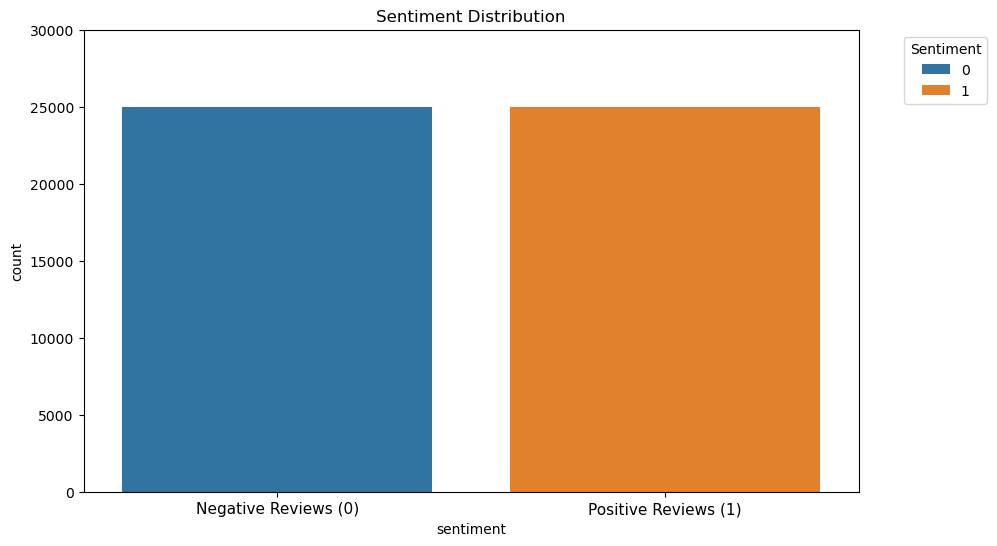

In [9]:
# Creating a countplot to visualize distribution of positve and negative classifications.

plt.figure(figsize=(10, 6))
sns.countplot(x=df['sentiment'], hue=df['sentiment'])
plt.legend(title="Sentiment", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.title("Sentiment Distribution")
plt.xticks(ticks=[0, 1], labels=["Negative Reviews (0)", "Positive Reviews (1)"], fontsize=11)
plt.ylim(0, 30000) 
plt.show()

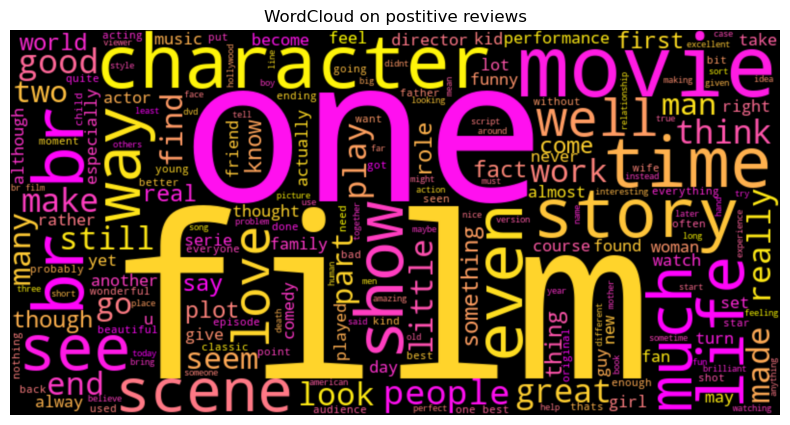

In [10]:
# Two different wordcloud images for getting a conceptual idea of the most frequently occuring words; One for positive and the other for negative.

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap = 'spring').generate(' '.join(df[df['sentiment'] == 1]['clean_review']))
plt.figure(figsize=(10, 5))
plt.title("WordCloud on postitive reviews")
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

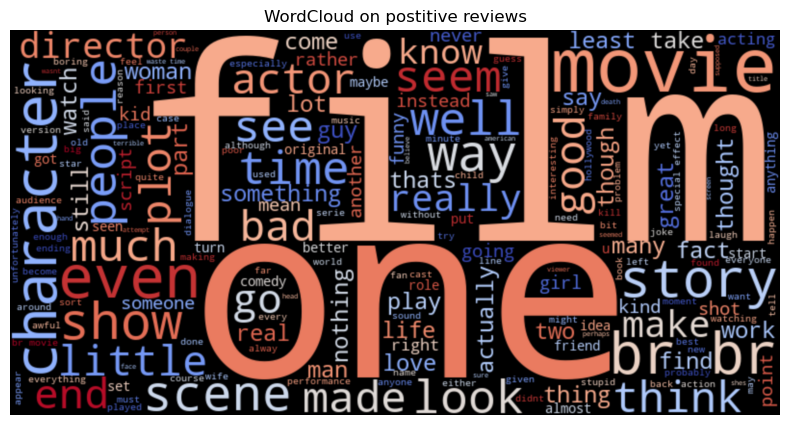

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap = 'coolwarm').generate(' '.join(df[df['sentiment'] == 0]['clean_review']))
plt.figure(figsize=(10, 5))
plt.title("WordCloud on postitive reviews")
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

In [12]:
# Tokenization creates integer sequences for each row. Padding is done to limit length of each sequence to 200 tokens.

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['clean_review'])
X_seq = tokenizer.texts_to_sequences(df['clean_review'])
X_padded = pad_sequences(X_seq, maxlen=200)
y = df['sentiment'].values

**Model training and Prediction**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [14]:
# Creating an early stopping function, to make sure best weights are retained in case of overfitting.

early_stopping = EarlyStopping(
    monitor='val_accuracy',       
    patience=3,                   
    restore_best_weights=True,    
)

In [ ]:
# Building a Deep Learning Sequential Model with stacked LSTMs and a dense layer with sigmoid activation function (Binary classification).

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, 200))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])
model.summary()

In [16]:
# Training and Running model on test data. Callbacks would call the early stopping function if val_accuracy drops across epochs.

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred = (model.predict(X_test) > 0.5).astype("int32") # converting decimals to integers (0 or 1)
print("LSTM Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 141ms/step - accuracy: 0.7732 - loss: 0.4532 - precision: 0.7837 - val_accuracy: 0.8867 - val_loss: 0.2735 - val_precision: 0.8849
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.9157 - loss: 0.2275 - precision: 0.9119 - val_accuracy: 0.8879 - val_loss: 0.2728 - val_precision: 0.8896
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - accuracy: 0.9440 - loss: 0.1584 - precision: 0.9430 - val_accuracy: 0.8761 - val_loss: 0.3518 - val_precision: 0.8958
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 140ms/step - accuracy: 0.9629 - loss: 0.1101 - precision: 0.9622 - val_accuracy: 0.8819 - val_loss: 0.3605 - val_precision: 0.8574
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 142ms/step - accuracy: 0.9753 - loss: 0.0789 - precision: 0.9754 - val_accuracy: 0.8761 - val_loss: 0.3701 - val_precision: 0.8715
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
LSTM Model Accuracy: 0.8879
              precision    recall  f1-score   support

    

In [17]:
# High-level overview of actual v/s predicted

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions_df)

      Actual  Predicted
0          1          0
1          1          1
2          0          0
3          1          1
4          0          0
...      ...        ...
9995       0          0
9996       1          1
9997       1          1
9998       0          0
9999       1          1

[10000 rows x 2 columns]
